In [1]:
# Supervised Learning – Classification Models
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

# Load cleaned datset
df = pd.read_csv('cleaned_heart_data.csv')

# Convert target to binary
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop('num', axis=1, inplace=True)

# Features and labels
X = df.drop('target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Cell 6: Train Multiple Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

# Train and store predictions
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

Logistic Regression trained successfully.
K-Nearest Neighbors trained successfully.
Random Forest trained successfully.
SVM trained successfully.


d:\all past files\desktop f\All files\Passant Programming\.vscode\summer2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
-------------------
Accuracy:  0.87
Precision: 0.81
Recall:    0.93
F1 Score:  0.87
AUC Score: 0.95


d:\all past files\desktop f\All files\Passant Programming\.vscode\summer2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


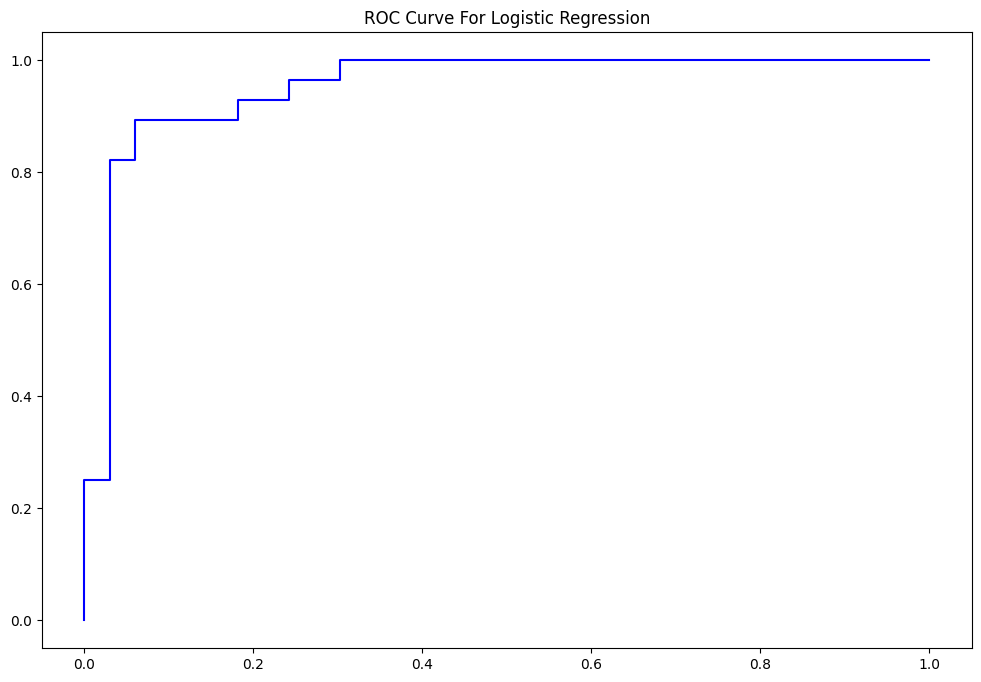

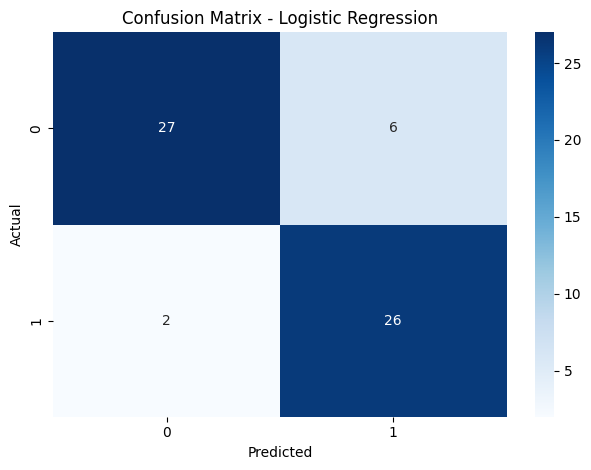


Random Forest
-------------
Accuracy:  0.92
Precision: 0.87
Recall:    0.96
F1 Score:  0.92
AUC Score: 0.96


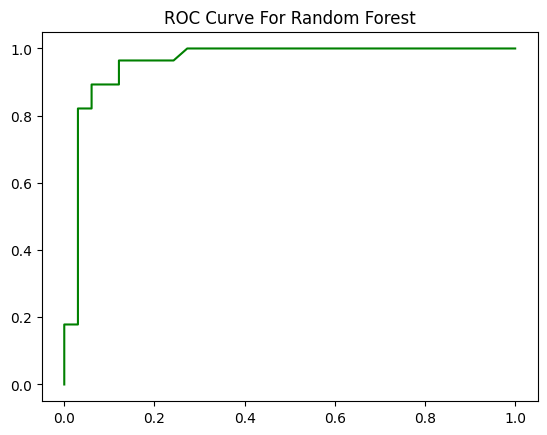

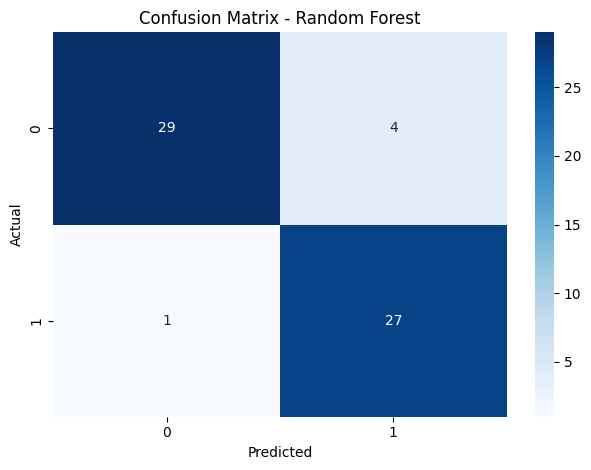


KNN
---
Accuracy:  0.70
Precision: 0.73
Recall:    0.57
F1 Score:  0.64
AUC Score: 0.78


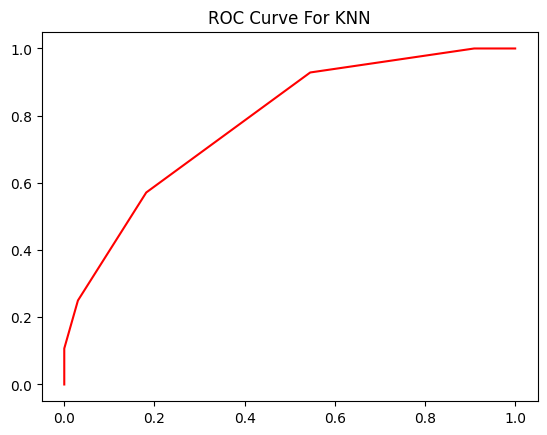

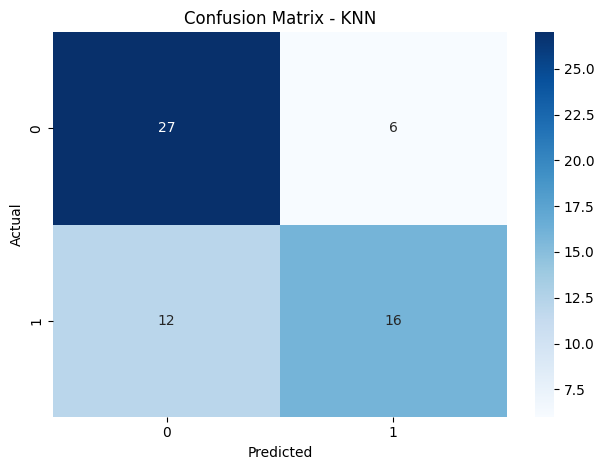


SVM (Linear)
------------
Accuracy:  0.85
Precision: 0.81
Recall:    0.89
F1 Score:  0.85
AUC Score: 0.94


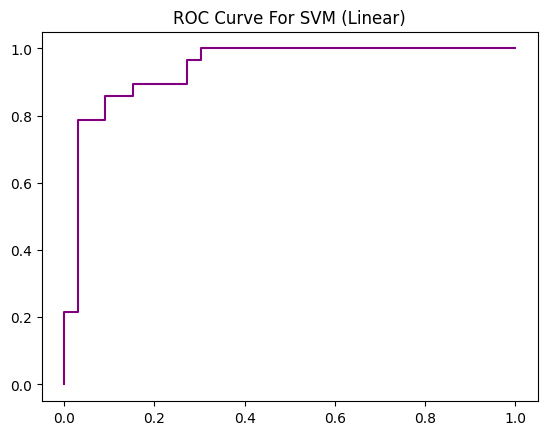

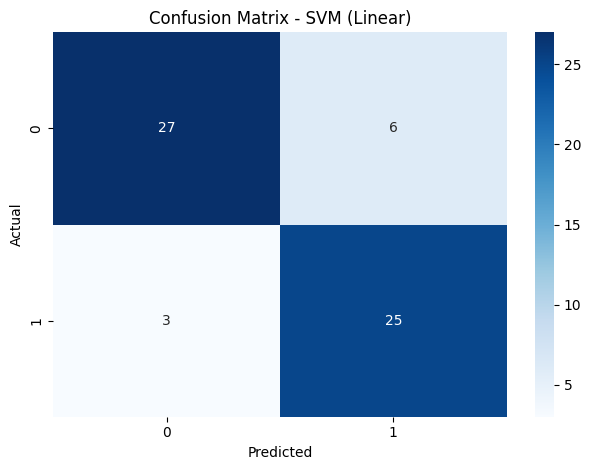


SVM (RBF)
---------
Accuracy:  0.69
Precision: 0.71
Recall:    0.54
F1 Score:  0.61
AUC Score: 0.79


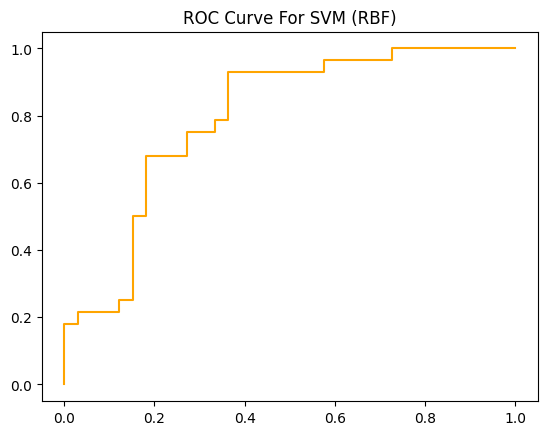

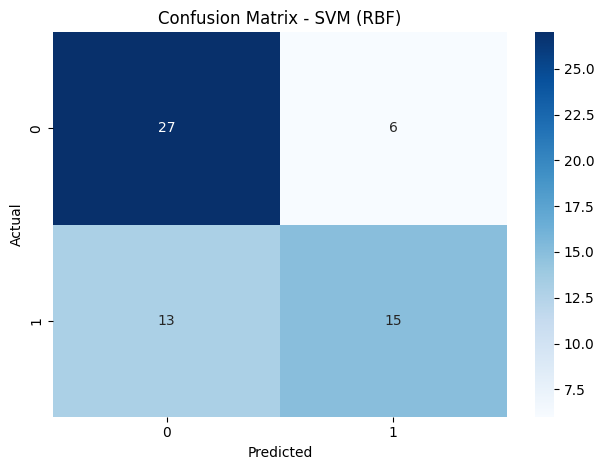


Naive Bayes
-----------
Accuracy:  0.87
Precision: 0.79
Recall:    0.96
F1 Score:  0.87
AUC Score: 0.95


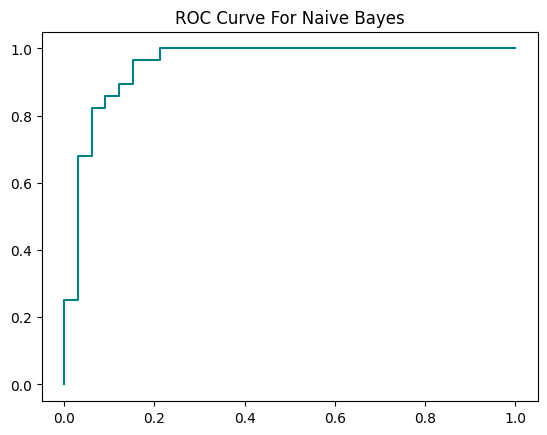

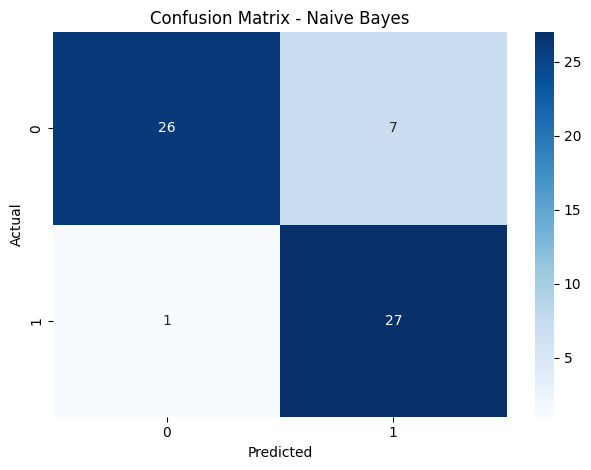

In [2]:
# Cell 7: Full Evaluation with ROC Curves and AUC Scores
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM (Linear)": SVC(kernel='linear', probability=True),
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB()
}

# Prepare plot
plt.figure(figsize=(12, 8))

# Colors for ROC curves
colors = ['blue', 'green', 'red', 'purple', 'orange', 'teal']

# Loop through models and evaluate
for (name, model), color in zip(models.items(), colors):
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=color, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.title(f'ROC Curve For {name}')

    # Print other evaluation metrics
    print(f"\n{name}")
    print("-" * len(name))
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.2f}")
    print(f"AUC Score: {roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


C:\Users\Mazen\AppData\Local\Temp\ipykernel_372\4092918997.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


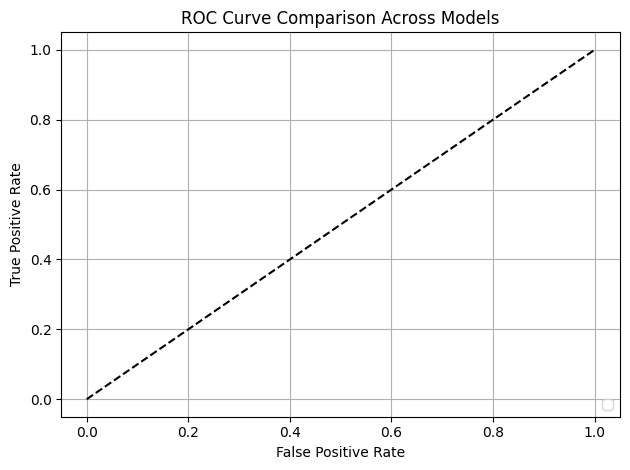

In [3]:
# Finalize ROC Plot
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison Across Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()